# Setup

## Library import
We import all the required Python libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

## Local library import
We import all the required local libraries libraries

In [3]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries
import yfinance
import scipy.stats
# Import local libraries

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [ ]:
data_df = yfinance.download("000300.SS", end="2022-11-06")
data_df.to_csv('CSI300.csv')

In [3]:
CSI300 = yfinance.Ticker("000300.SS")

<AxesSubplot:xlabel='Date'>

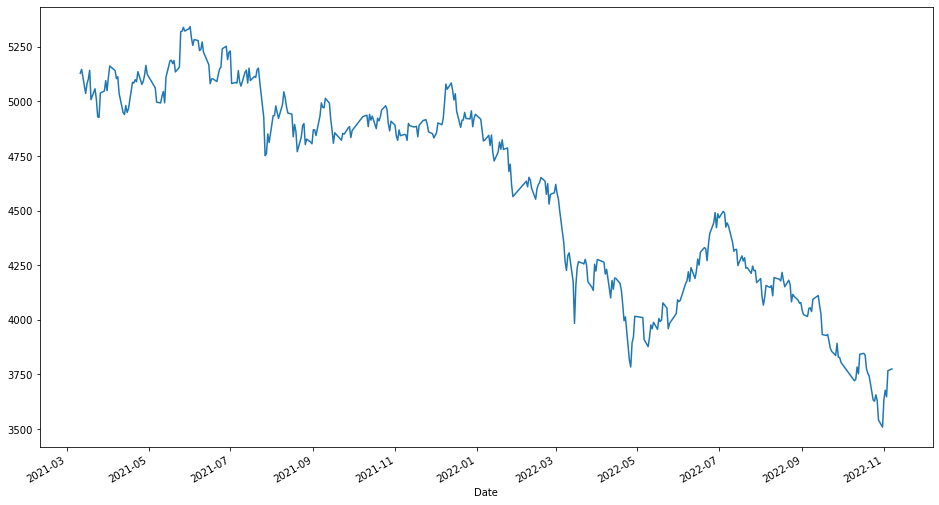

In [5]:
hist = CSI300.history(period = 'max')
hist['Close'].plot(figsize=(16, 9))

# I will use the following data for my analysis

In [4]:
data = pd.read_csv("3188_hk_d.csv")
import matplotlib.dates as mdates

In [5]:
data['Date']

0       2012-10-26
1       2012-10-29
2       2012-10-30
3       2012-10-31
4       2012-11-01
           ...    
2464    2022-10-31
2465    2022-11-01
2466    2022-11-02
2467    2022-11-03
2468    2022-11-04
Name: Date, Length: 2469, dtype: object

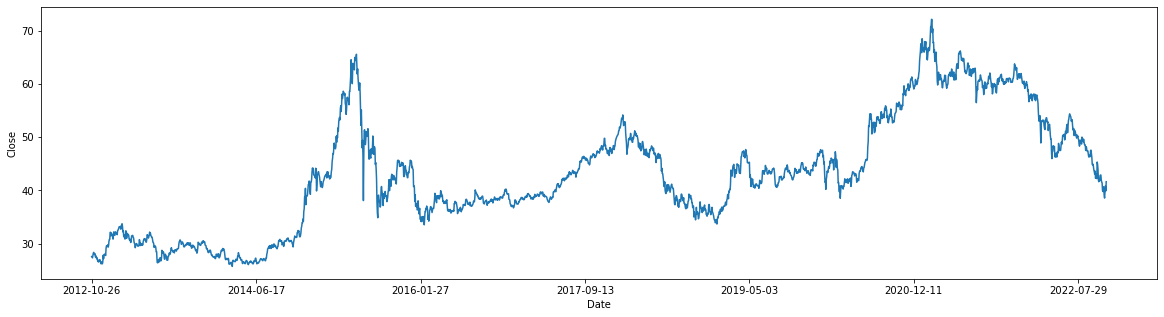

In [6]:
plt.figure(figsize = (20,5))
plt.plot(data['Date'], data['Close'])
plt.xticks(data['Date'][::400])
plt.ylabel('Close')
plt.xlabel('Date')
plt.show()

# Data processing

In [19]:
#returns = data['Close'].pct_change().dropna()
rv_per_day = pd.DataFrame({
    'returns': data['Close'].pct_change().dropna(),
    'date': data['Date'][1:]
    
#    'rv': [x**2 for x in returns['returns']]
})
realised_volatility = [x**2 for x in rv_per_day['returns']]
rv_per_day['rv'] = realised_volatility



returns_ = data['Close'].pct_change().dropna()
rv =[]
dates = []
for i in range(4, returns_.shape[0], 5):
    rv.append(np.sum([x**2 for x in returns_[i-5:i]])/5)
    dates.append(data['Date'][i])

rv_per_week = pd.DataFrame({'date': dates, 'rv': rv})
#returns['week_number'] = [y.dt.isocalendar().week for y in [pd.Timestamp(x) for x in returns['date']]]
#print(returns.shape)

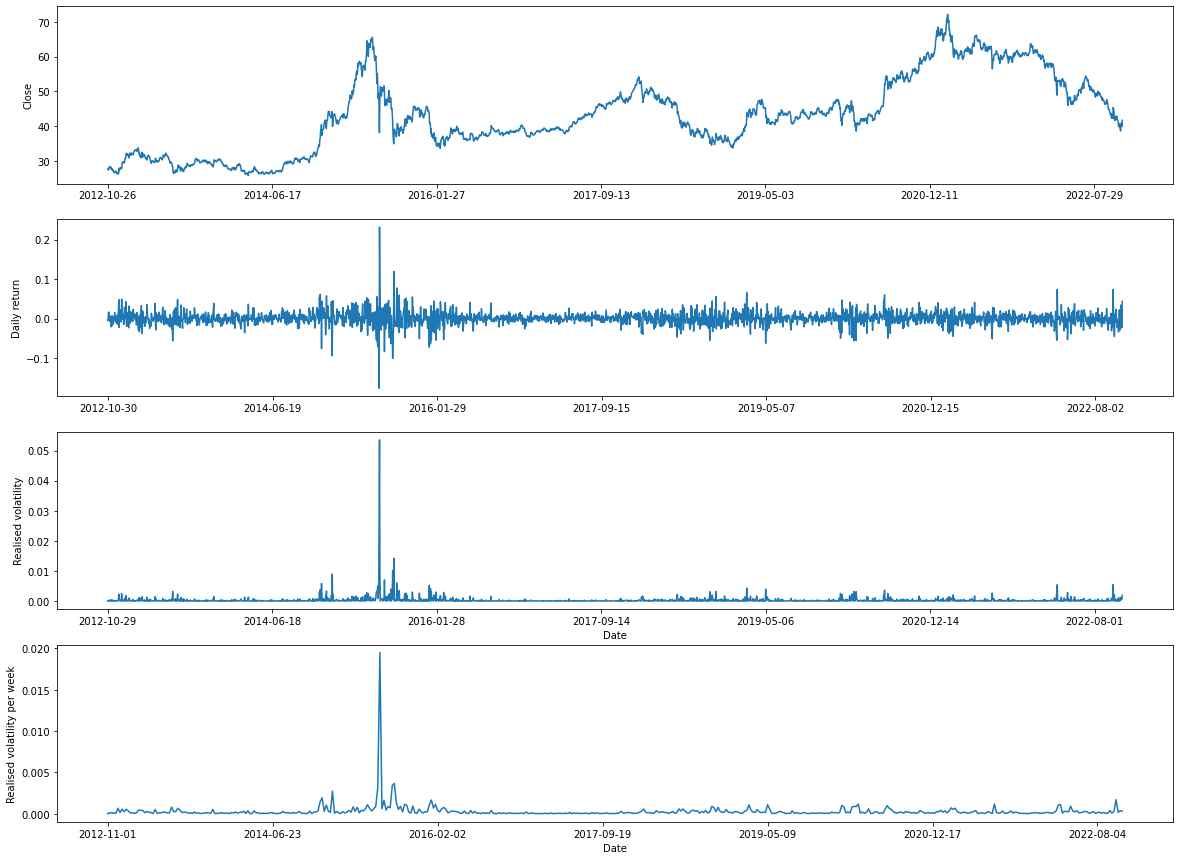

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(20, 15))

ax[0].plot(data['Date'], data['Close'])
ax[0].set_xticks(data['Date'][::400])
ax[0].set_ylabel('Close')
#ax.xlabel('Date')

ax[1].plot(rv_per_day['date'], rv_per_day['returns'])
ax[1].set_xticks(rv_per_day['date'][1:][::400])
ax[1].set_ylabel('Daily return')
#ax.xlabel('Date')

ax[2].plot(data['Date'][1:], realised_volatility)
ax[2].set_xticks(data['Date'][1:][::400])
ax[2].set_ylabel('Realised volatility')
ax[2].set_xlabel('Date')

ax[3].plot(dates, rv)
ax[3].set_xticks(dates[::80])
ax[3].set_ylabel('Realised volatility per week')
ax[3].set_xlabel('Date')



plt.show()

C:\Users\dcher\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


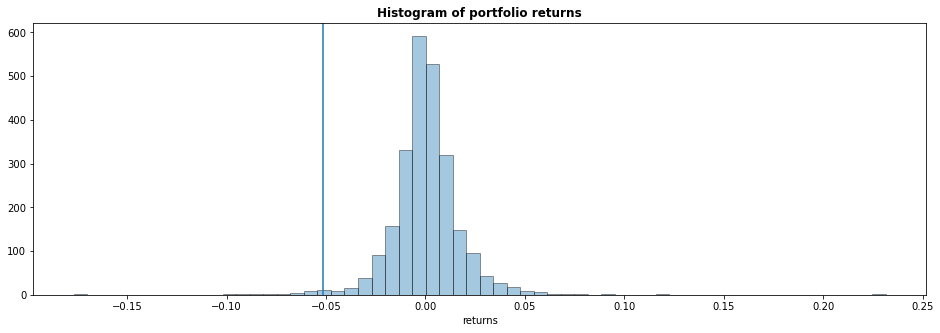

-0.05125558885828748


In [131]:
import seaborn as sns
fig = plt.figure(figsize=(16, 5))

sns.distplot(rv_per_day['returns'], hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(np.quantile(rv_per_day['returns'], 0.01))
plt.title("Histogram of portfolio returns", weight="bold")

plt.show()
print(np.quantile(rv_per_day['returns'], 0.01))

In [123]:
from statsmodels.tsa.stattools import adfuller
data_characteristics = pd.DataFrame()
i = 0
#print(np.quantile(returns['returns'], 0.01))
for ind, dat in enumerate([rv_per_day['returns'].values, rv_per_day['rv'].values]):
    data_characteristics.loc[ind, 'mean'] = np.mean(dat)
    data_characteristics.loc[ind, 'var'] = np.var(dat)
    #data_characteristics.loc[ind, 'skewness'] = scipy.stats.skew(dat)
    #data_characteristics.loc[ind, 'kurtuosis'] = scipy.stats.kurtosis(dat)
    data_characteristics.loc[ind, 'Jarque-Bera'] = scipy.stats.jarque_bera(dat)[0]
    data_characteristics.loc[ind, 'ADF'] = adfuller(dat)[0]
    print(adfuller(dat))
    print(scipy.stats.jarque_bera(dat))
    
for ind, dat in enumerate([rv_per_day.loc[rv_per_day['returns']<=np.quantile(rv_per_day['returns'], 0.01)]['returns'].values, rv_per_day.loc[rv_per_day['returns']<=np.quantile(rv_per_day['returns'], 0.01)]['rv'].values]):
    data_characteristics.loc[ind, 'skewness'] = scipy.stats.skew(dat)
    data_characteristics.loc[ind, 'kurtuosis'] = scipy.stats.kurtosis(dat)
    #data_characteristics.loc[ind, 'Jarque-Bera'] = scipy.stats.jarque_bera(dat)[0]
    #data_characteristics.loc[ind, 'ADF'] = adfuller(dat)[0]
    #print(adfuller(dat))
    #print(scipy.stats.jarque_bera(dat))
    
    #data_characteristics.loc[ind, 'skewness'] = scipy.stats.skew(dat)
    #data_characteristics.loc[ind, 'kurtuosis'] = scipy.stats.kurtosis(dat)
    #data_characteristics.loc[ind, 'Jarque-Bera'] = scipy.stats.jarque_bera(dat)[0]
    #data_characteristics.loc[ind, 'ADF'] = adfuller(dat)[0]'''

(-9.003196833117217, 6.4145227926090275e-15, 24, 2443, {'1%': -3.4330295678957983, '5%': -2.8627238067228236, '10%': -2.5674001882176833}, -12873.476583645379)
Jarque_beraResult(statistic=43417.99495491587, pvalue=0.0)
(-11.08212573664601, 4.285225538541544e-20, 11, 2456, {'1%': -3.43301536964955, '5%': -2.862717536880851, '10%': -2.5673968500527855}, -25704.51458997639)
Jarque_beraResult(statistic=78852823.76912318, pvalue=0.0)


In [124]:
data_characteristics

,mean,var,Jarque-Bera,ADF,skewness,kurtuosis
0,0.000317,0.000301,4.341799e+04,-9.003197,-3.107457,10.119452
1,0.000301,0.000002,7.885282e+07,-11.082126,3.919542,15.115977


# Try to write HAR models (for days)

In [84]:
def RV_tj(df, t, j, h):
    return (1/ (h + 1-j)) * np.sum([x for x in df['rv'][t-h:t-j]])

def HAR(df):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = x[1]['date']
            HAR_data.loc[ind, 'day'] = df['rv'][ind-1]
            HAR_data.loc[ind, 'week'] = RV_tj(df, ind, 1, 5)
            HAR_data.loc[ind,
                         'month'] =  RV_tj(df, ind, 1, 22)
            HAR_data.loc[ind, 'rv'] = df['rv'][ind]
            #HAR_data.loc[ind,
            #             'cvartaly'] = np.sum(rv['returns'][ind - 66:ind]) / 66
    return HAR_data

#This models need data for hours/minutes trading 
'''def HAR_j(df):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(rv.iterrows()):
        if ind > 65:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = df['date']
            HAR_data.loc[ind, 'rv'] = df['rv']
            HAR_data.loc[ind, 'daily'] = df['returns']
            HAR_data.loc[ind,
                         'weekly'] = np.sum(rv['returns'][ind - 5:ind]) / 5
            HAR_data.loc[ind,
                         'monthly'] = np.sum(rv['returns'][ind - 22:ind]) / 22
            HAR_data.loc[ind,
                         'cvartaly'] = np.sum(rv['returns'][ind - 66:ind]) / 66
            HAR_data.loc[ind, 'jump'] = max(
                HAR_data['weekly'][ind] - (np.pi / 2) * np.sum([
                    rv['returns'][i] * rv['returns'][i + 1]
                    for i in range(ind - 5, ind)
                ]), 0)
    return HAR_data

def CHAR(rv):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(rv.iterrows()):
        if ind > 65:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = x[1]['date']
            
            HAR_data.loc[ind, 'rv'] = df['rv'][ind-1]
            HAR_data.loc[ind, 'daily'] = df['returns'][ind-1]
            HAR_data.loc[ind,
                         'week'] = np.sum(df['returns'][ind - 5:ind]) / 5
            HAR_data.loc[ind,
                         'month'] = np.sum(rv['returns'][ind - 22:ind]) / 22
            HAR_data.loc[ind,
                         'cvartal'] = np.sum(rv['returns'][ind - 66:ind]) / 66
            HAR_data.loc[ind, 'weekly'] = (np.pi / 2) * np.sum([
                    rv['returns'][i] * rv['returns'][i + 1]
                    for i in range(ind - 5, ind)
                ])
    return HAR_data
'''
def SHAR(df):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = df['date'][ind]
            #print(x[1]['returns'])
            if x[1]['returns'] > 0:
                HAR_data.loc[ind, 'day+'] = df['rv'][ind-1]
                HAR_data.loc[ind, 'day-'] = 0
            else:
                HAR_data.loc[ind, 'day+'] = 0
                HAR_data.loc[ind, 'day-'] = df['rv'][ind-1]
            HAR_data.loc[ind, 'week'] = RV_tj(df, ind, 1, 5)
            HAR_data.loc[ind,
                         'month'] =  RV_tj(df, ind, 1, 22)
            HAR_data.loc[ind, 'rv'] = df['rv'][ind]
    return HAR_data

def HARQ(df):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = x[1]['date']
            HAR_data.loc[ind, 'RQ^1/2'] = (((df['returns'][ind-1] ** 4) / 3) ** (1/2)) * df['rv'][ind-1]
            HAR_data.loc[ind, 'day'] = df['rv'][ind-1]
            HAR_data.loc[ind, 'week'] = RV_tj(df, ind, 1, 5)
            HAR_data.loc[ind, 'month'] =  RV_tj(df, ind, 1, 22)
            HAR_data.loc[ind, 'rv'] = df['rv'][ind]
    return HAR_data
            
def RQ_tj(df, t, j, h):
    return (1/ (h + 1-j)) * (np.sum([(x**4) for x in df['returns'][t-h:t-j]]) / 3) ** (1/2)


def HARQF(df):
    HAR_data = pd.DataFrame()
    for ind, x in enumerate(df.iterrows()):
        if ind > 21:
            #print(x[1]['date'])
            HAR_data.loc[ind, 'date'] = x[1]['date']
            HAR_data.loc[ind, 'day'] = df['rv'][ind-1]
            HAR_data.loc[ind, 'day_RQ^1/2'] = (((df['returns'][ind-1] ** 4) / 3) ** (1/2)) * df['rv'][ind-1]
            HAR_data.loc[ind, 'week'] = RV_tj(df, ind, 1, 5)
            HAR_data.loc[ind, 'week_RQ^1/2'] = RQ_tj(df, ind, 1, 5) * RV_tj(df, ind, 1, 5)
            HAR_data.loc[ind, 'month'] =  RV_tj(df, ind, 1, 22)
            HAR_data.loc[ind, 'month_RQ^1/2'] =  RQ_tj(df, ind, 1, 22) * RV_tj(df, ind, 1, 22)
            HAR_data.loc[ind, 'rv'] = df['rv'][ind]
    return HAR_data

In [65]:
HARQF(rv_per_day)

,date,day,day_RQ^1/2,week,week_RQ^1/2,month,month_RQ^1/2,rv
22,2012-11-28,0.000082,0.000048,0.000069,0.000027,0.000102,0.000019,0.000053
23,2012-11-29,0.000053,0.000031,0.000036,0.000012,0.000104,0.000019,0.000167
24,2012-11-30,0.000167,0.000096,0.000067,0.000023,0.000110,0.000020,0.000031
25,2012-12-03,0.000031,0.000018,0.000067,0.000023,0.000099,0.000019,0.000086
26,2012-12-04,0.000086,0.000050,0.000068,0.000023,0.000092,0.000018,0.000216
...,...,...,...,...,...,...,...,...
2463,2022-10-31,0.000087,0.000050,0.000349,0.000144,0.000585,0.000161,0.000857
2464,2022-11-01,0.000857,0.000495,0.000292,0.000114,0.000580,0.000161,0.000205
2465,2022-11-02,0.000205,0.000118,0.000328,0.000117,0.000587,0.000161,0.001172
2466,2022-11-03,0.001172,0.000677,0.000464,0.000170,0.000633,0.000164,0.000604


# Try first model

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score

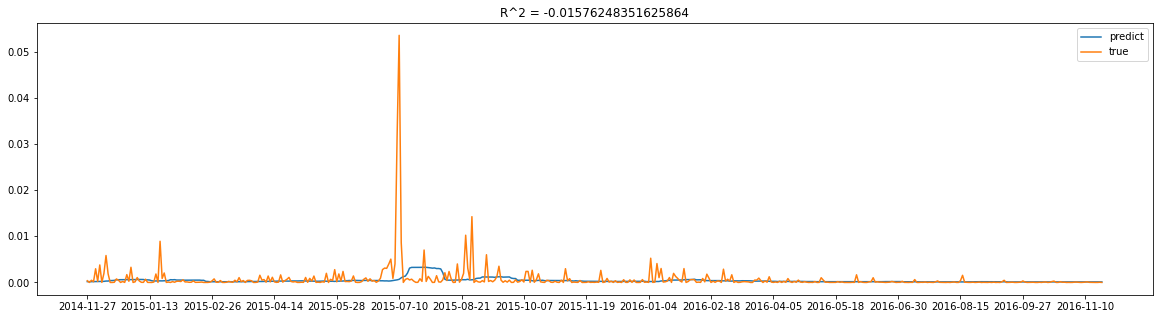

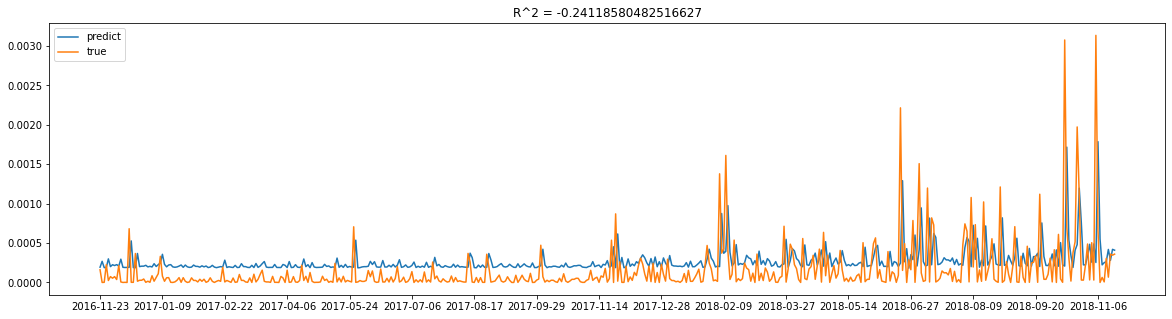

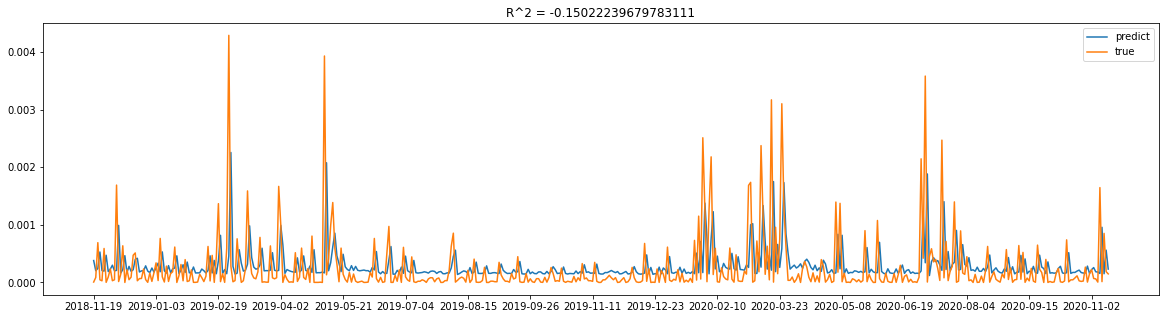

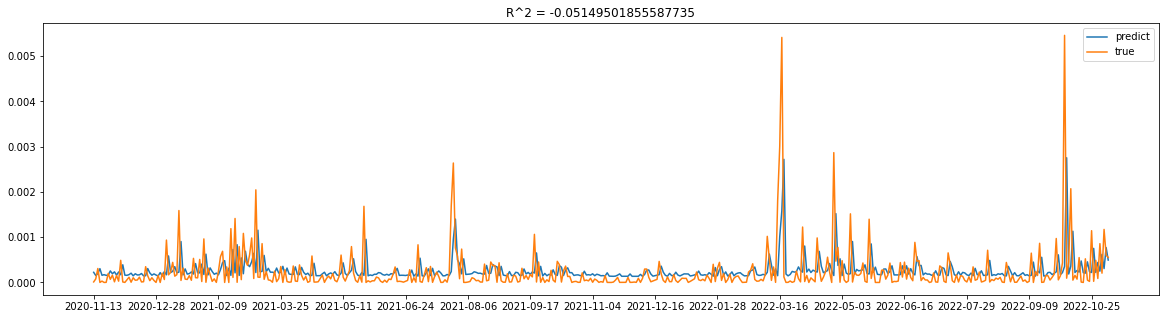

In [141]:
df = HAR(rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()


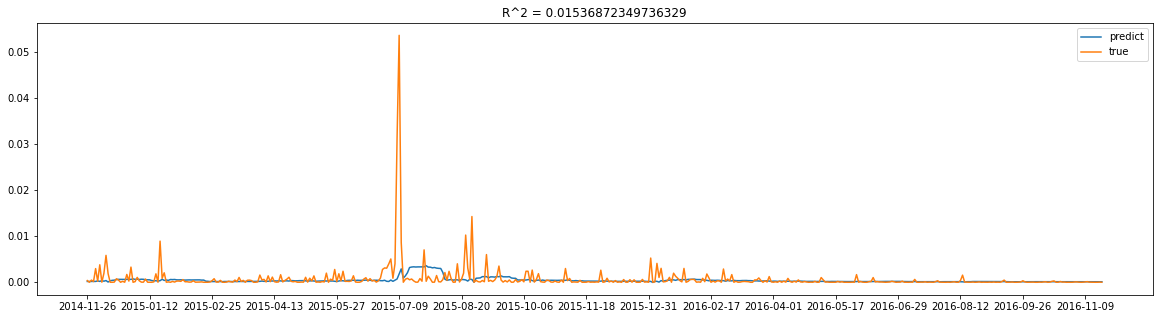

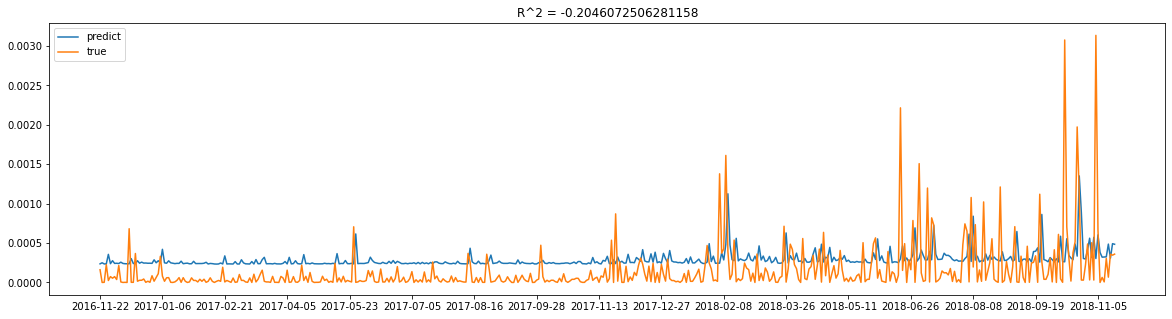

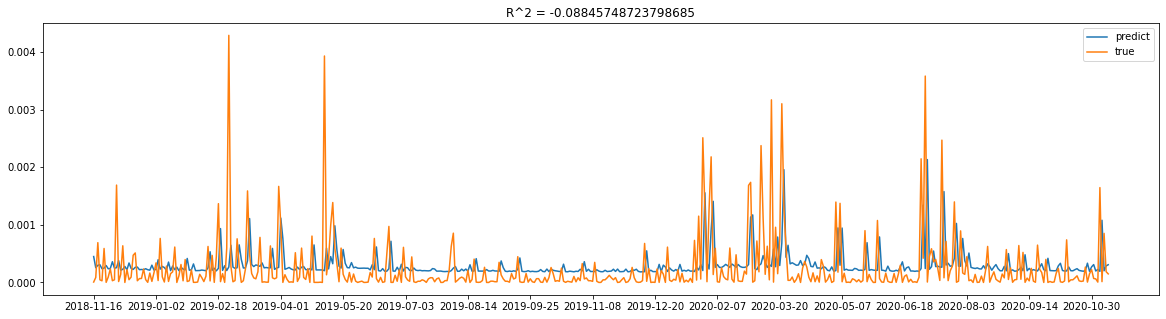

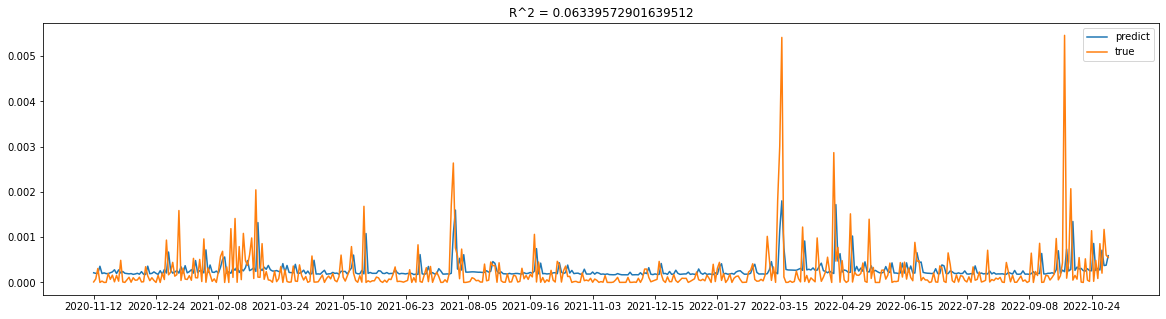

In [142]:
df = SHAR(rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

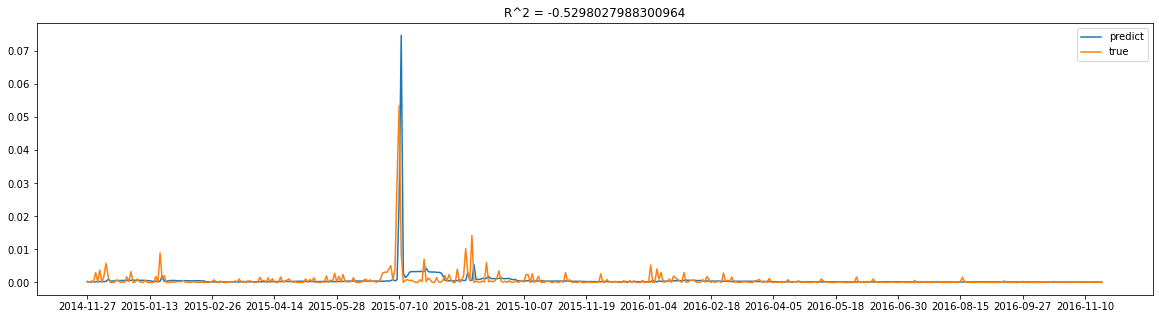

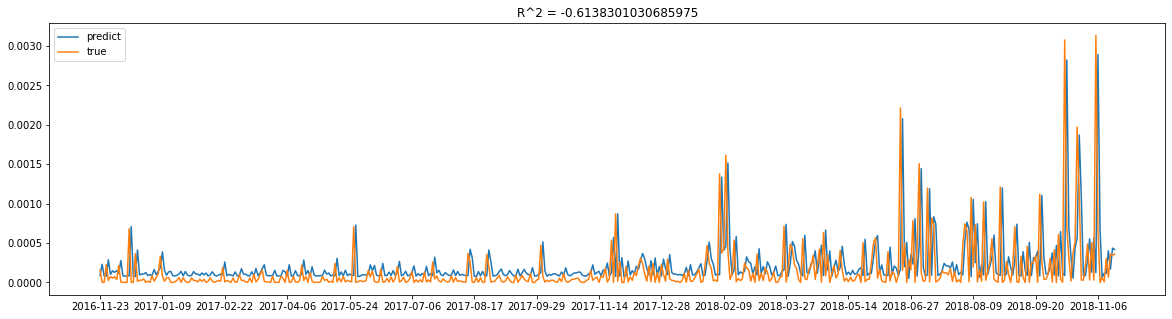

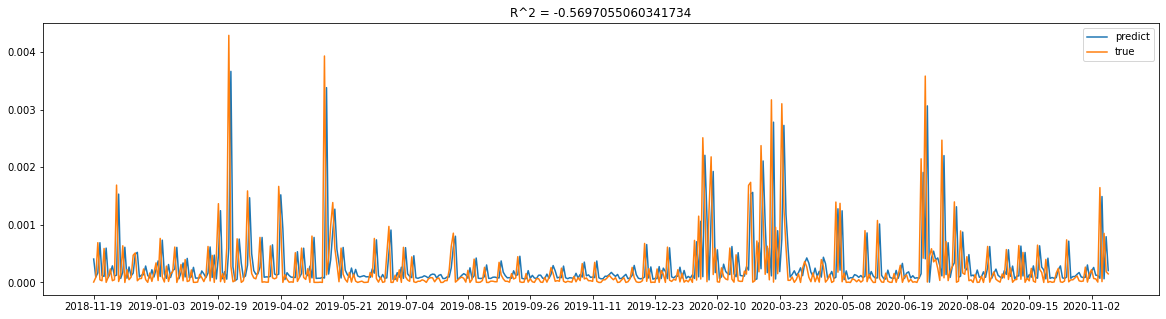

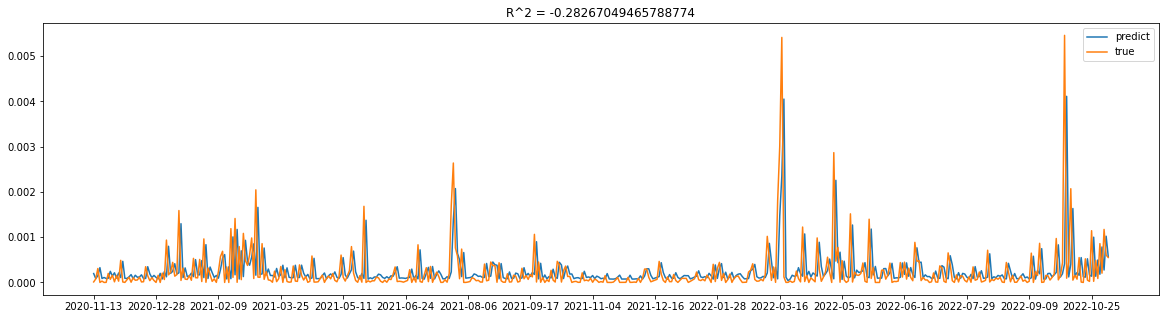

In [143]:
df = HARQ(rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

['day', 'day_RQ^1/2', 'week', 'week_RQ^1/2', 'month', 'month_RQ^1/2']


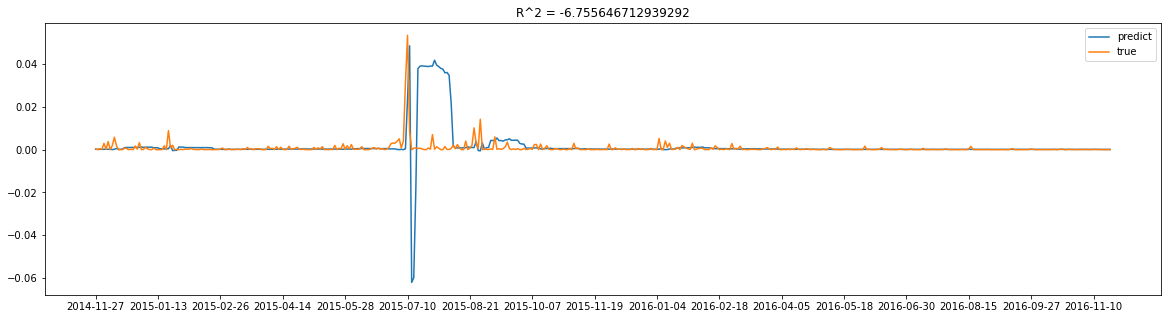

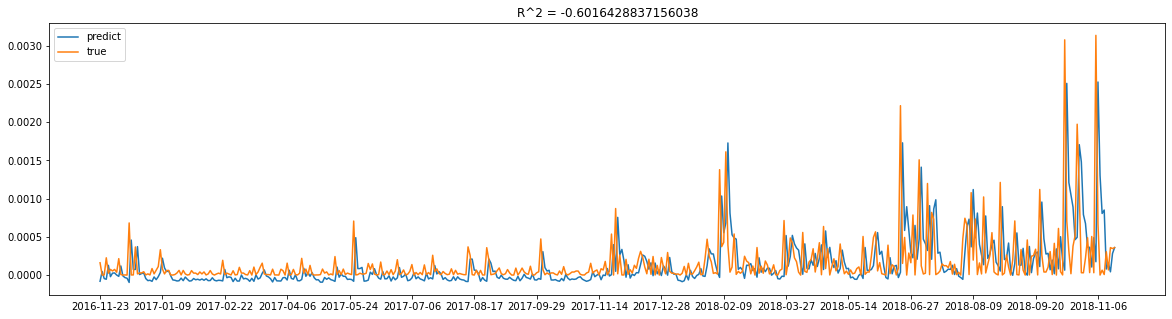

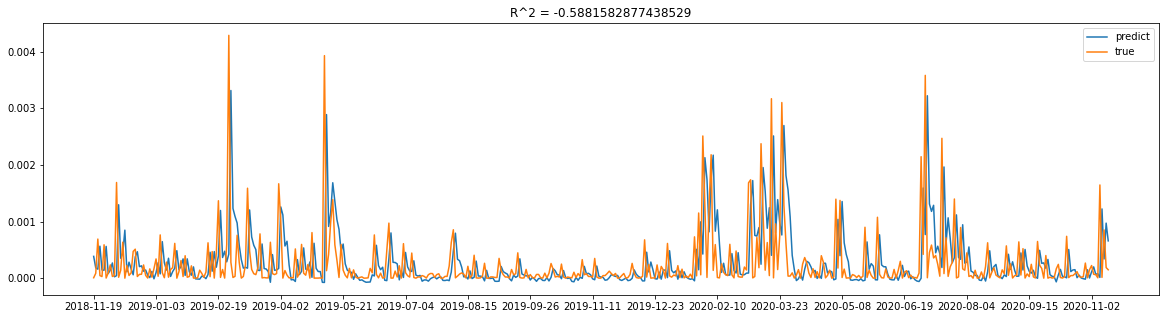

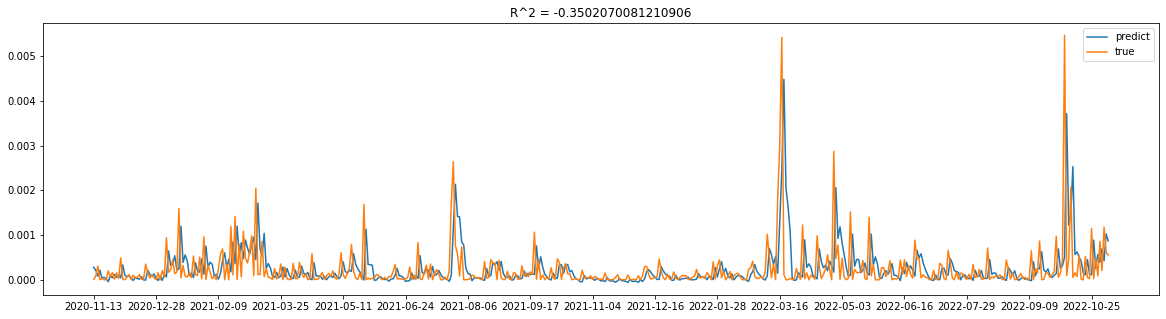

In [144]:
df = HARQF(rv_per_day)
features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
print(features)
target = ['rv']
tscv = TimeSeriesSplit(n_splits = 4)
for train_index, test_index in tscv.split(df):
    cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    X_train = cv_train[features]
    y_train = cv_train[target]
    X_test = cv_test[features]
    y_test = cv_test[target]
    reg = LinearRegression().fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(cv_test['date'],reg.predict(X_test), label = 'predict')
    ax.plot(cv_test['date'],y_test, label = 'true')
    ax.set_xticks(cv_test['date'][::30])
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    ax.legend()
    plt.show()

{'day': 0.47570910413347745,
 'week': -0.046354878592729715,
 'month': 0.16208954459036656}

{'day+': 0.5197594205368129,
 'day-': 0.0889111613098061,
 'week': 0.005335309681217316,
 'month': 0.1786957455939499}

{'RQ^1/2': -12.682413340781991,
 'day': 0.7662687806642831,
 'week': -0.052584801819632966,
 'month': 0.10819238724584361}

{'day': 0.4574341499707194,
 'day_RQ^1/2': -1.2402610463080224,
 'week': 1.0704393728450161,
 'week_RQ^1/2': -169.1202222453922,
 'month': 0.10126351051838661,
 'month_RQ^1/2': -88.28123566739471}

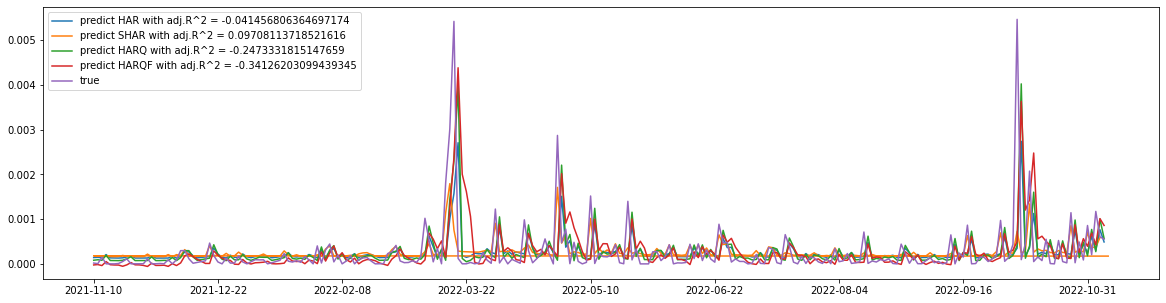

In [145]:
i = 0
names = ['HAR', 'SHAR', 'HARQ', 'HARQF']

fig = plt.figure(figsize=(20, 5))
for df in [x(rv_per_day) for x in [HAR, SHAR, HARQ, HARQF]]:
    features = [x for x in df.columns if (x != 'rv') & (x != 'date')]
    target = ['rv']
    #tscv = TimeSeriesSplit(n_splits = 4)
    #for train_index, test_index in tscv.split(df):
    #cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
    param = 9 * df.shape[0]//10
    X_train = df[features][:param]
    y_train = df[target][:param]
    X_test = df[features][param:]
    y_test = df[target][param:]
    #print(df.shape, X_train.shape, X_test.shape)
    reg = LinearRegression().fit(X_train, y_train)
    coefficents = {}
    coef = reg.coef_[0]
    for ind, x in enumerate([x for x in coef]):
        coefficents[features[ind]] = x
    display(coefficents)
    plt.plot(df['date'][param:],reg.predict(X_test), label = 'predict ' + names[i] + ' with adj.R^2 = ' + str(1 - ((1 - r2_score(y_test, reg.predict(X_test))) * (y_test.shape[0] -1) / (y_test.shape[0] - len(features) -1))))
    if (i == 3):
    #text = str('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
    
        #ax.set_title('R^2 = '+ str(r2_score(y_test, reg.predict(X_test))))
        plt.plot(df['date'][param:],y_test, label = 'true')
        plt.xticks(df['date'][param:][::30])
        plt.legend()
        plt.show()
    i +=1